
Usage:   
  pip <command> [options]

no such option: --upgrade


In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
col =['label','id','date','query','twitter_handle','tweet']
df = pd.read_csv(r'C:\Users\satya\tweetz.csv',names=col,header=None,encoding ='latin-1')
df

,label,id,date,query,twitter_handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


USING 2 PREPROCESSING TECHNIQUES

PREPROCESS() FUNCTION TAKEN TWEET AS AN ARGUEMENT AND RETURNS A LIST CONTAINING PREPROCESSED TEXT 
PREPROCESS2() FUNCTION TAKES THE ENTIRE TWEET COLUMN ALONG WITH A NEW COLUMN AS AN ARGUEMENT AND ADDS THE PREPROCESSED TEXT IN THE NEW COLUMN


PREPROCESS() TAKES MORE TIME THAN PREPROCESS2() 


In [4]:
def preprocess(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www\S+|https\S+',"",tweet,flags = re.MULTILINE)
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r'\@\w+|\#',"",tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
    return lemma_words

In [5]:
def preprocess2(tweet, new_col):
    def remove_pattern(input_txt, pattern):
        r = re.findall(pattern, input_txt)
        for word in r:
            input_txt = re.sub(word, "", input_txt)
        return input_txt
    df[new_col] = np.vectorize(remove_pattern)(tweet, "@[\w]*")
    df[new_col] = df[new_col].str.replace("[^a-zA-Z#]", " ")
    df[new_col] = df[new_col].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
    tokenized_tweet = df[new_col].apply(lambda x: x.split())
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()

    tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
    df[new_col] = tokenized_tweet
    return df[new_col]

In [6]:
df['clean_tweet'] = df['tweet'].apply(lambda x: preprocess(x))


In [7]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([str(word) for word in x]))


In [8]:
 preprocess2(df['tweet'],'clean_tweet2')

C:\Users\satya\AppData\Local\Temp\ipykernel_2808\2353425536.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_col] = df[new_col].str.replace("[^a-zA-Z#]", " ")


0          http twitpic awww that bummer shoulda david ca...
1          upset that updat facebook text might result sc...
2                  dive mani time ball manag save rest bound
3                            whole bodi feel itchi like fire
4                               behav here becaus over there
                                 ...                        
1599995                 just woke have school best feel ever
1599996    thewdb veri cool hear walt interview http blip...
1599997                        readi your mojo makeov detail
1599998          happi birthday alll time tupac amaru shakur
1599999                                happi #charitytuesday
Name: clean_tweet2, Length: 1600000, dtype: object

df['clean tweet'] contains preprocessed text from preprocess() function and df['clean tweet2'] contains preprocessed text from preprocess2() function

In [9]:
df

,label,id,date,query,twitter_handle,tweet,clean_tweet,clean_tweet2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot that bummer shoulda got david carr ...,http twitpic awww that bummer shoulda david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...,upset that updat facebook text might result sc...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save 50 res...,dive mani time ball manag save rest bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav im mad cant see,behav here becaus over there
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feel ever,just woke have school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview â «,thewdb veri cool hear walt interview http blip...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail,readi your mojo makeov detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happi 38th birthday boo alll time tupac amaru ...,happi birthday alll time tupac amaru shakur


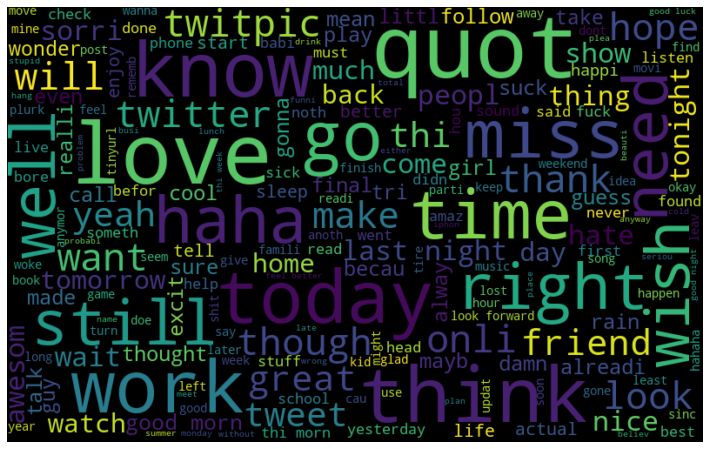

In [10]:
all_words = " ".join([sentence for sentence in df['clean_tweet2']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plotting frequencies of -ve words from clean_tweet2

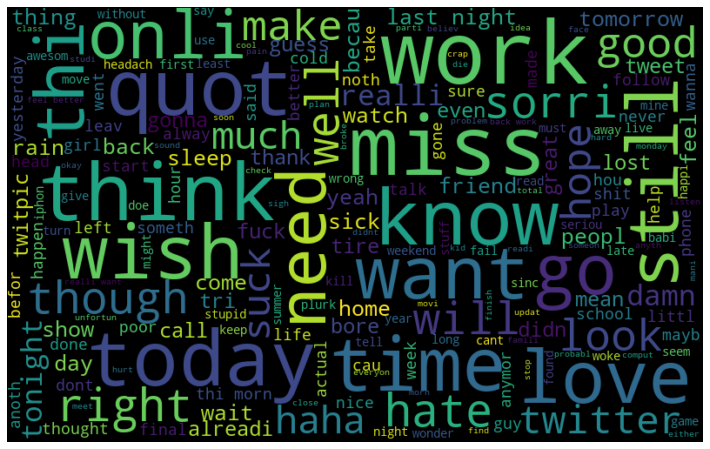

In [11]:
all_words = " ".join([sentence for sentence in df['clean_tweet2'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df.label.value_counts()

0    800000
4    800000
Name: label, dtype: int64

plotting frequencies of +ve words from clean_tweet2

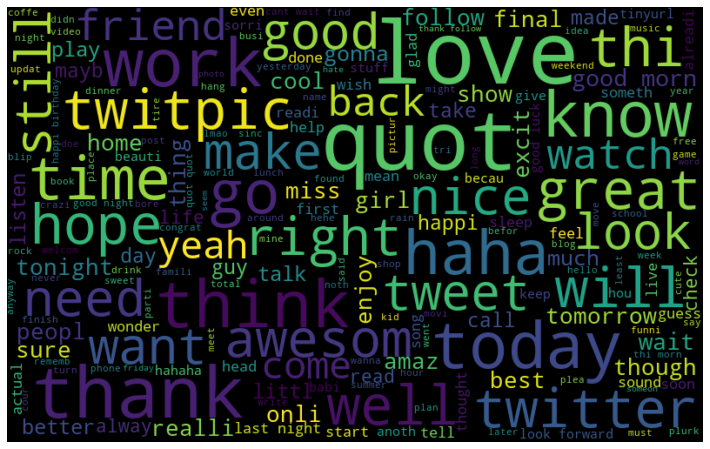

In [13]:
all_words = " ".join([sentence for sentence in df['clean_tweet2'][df['label']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plotting frequencies of -ve words from clean_tweet

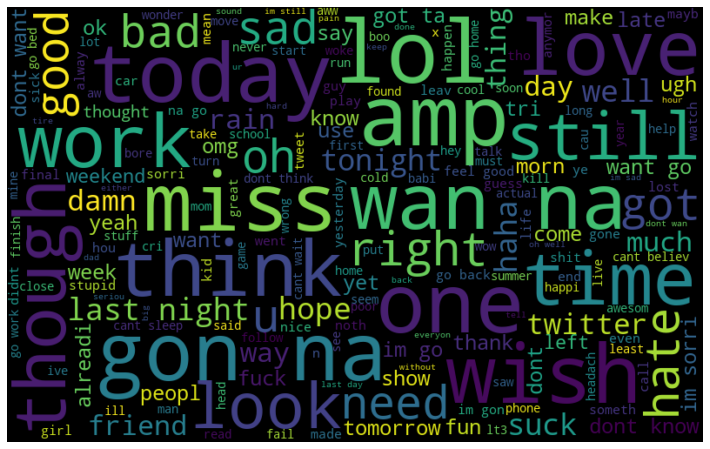

In [14]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plotting frequencies of +ve words from clean_tweet

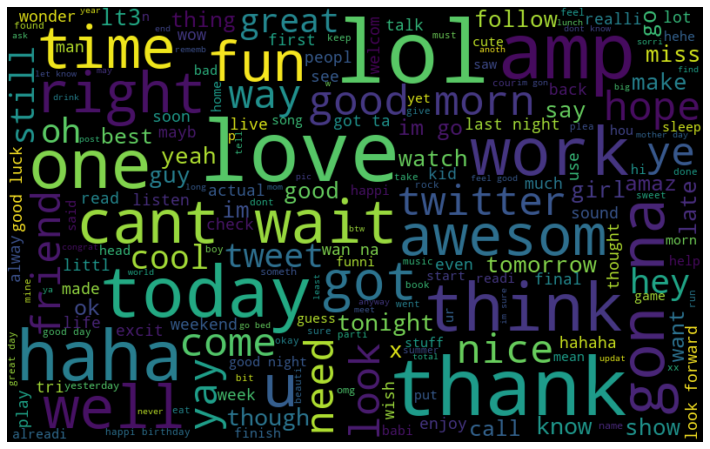

In [15]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df

,label,id,date,query,twitter_handle,tweet,clean_tweet,clean_tweet2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot that bummer shoulda got david carr ...,http twitpic awww that bummer shoulda david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...,upset that updat facebook text might result sc...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save 50 res...,dive mani time ball manag save rest bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav im mad cant see,behav here becaus over there
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feel ever,just woke have school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview â «,thewdb veri cool hear walt interview http blip...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail,readi your mojo makeov detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happi 38th birthday boo alll time tupac amaru ...,happi birthday alll time tupac amaru shakur


In [17]:
def hashtag(col):
    hashtag = []
    for tweet in col:
        ht = re.findall(r"#(\w+)", tweet)
        if len(ht)>0:
            hashtag.append(ht)
    return hashtag
            

In [18]:
ht_positive = hashtag(df['clean_tweet2'][df['label']==4])
ht_negative = hashtag(df['clean_tweet2'][df['label']==0])
ht_positive[:5]

[['devun'], ['alexa'], ['japan', 'skype'], ['explet'], ['musicmonday']]

In [19]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [20]:

freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,5
3,skype,3
4,explet,1
...,...,...
6757,computerart,1
6758,digitalbritain,1
6759,blockhh,1
6760,commtel,1


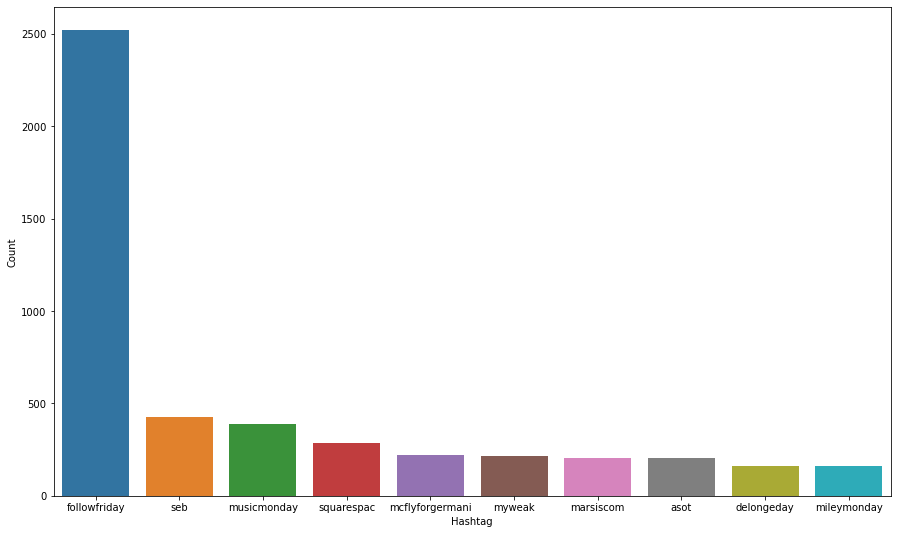

In [21]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [22]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,ttsc,1
3,gayforpeavi,1
4,fml,24


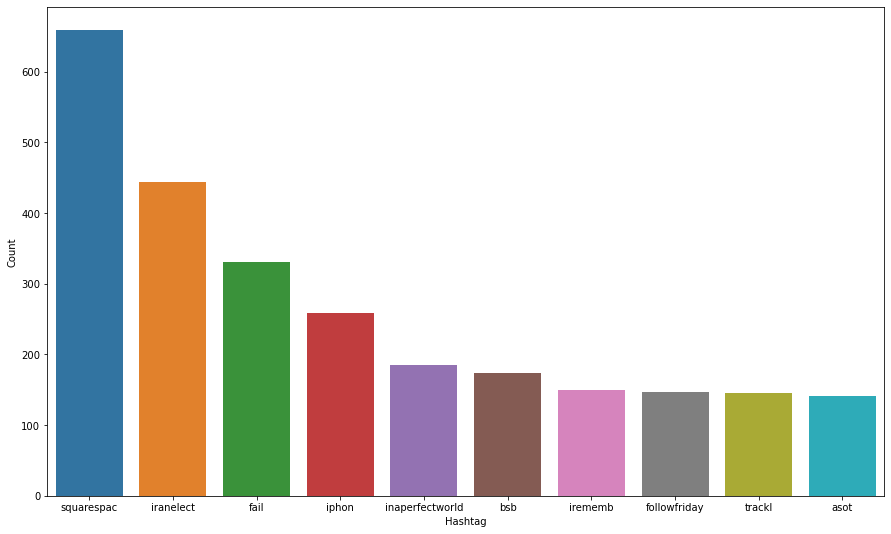

In [23]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=3, min_df=1, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
bow2 = bow_vectorizer.fit_transform(df['clean_tweet2']) 

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)
x_train2, x_test2, y_train2, y_test2 = train_test_split(bow2, df['label'], random_state=42, test_size=0.25)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.4991725

In [34]:
from sklearn.metrics import classification_report

In [51]:
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    199581
           4       0.64      0.00      0.00    200419

    accuracy                           0.50    400000
   macro avg       0.57      0.50      0.33    400000
weighted avg       0.57      0.50      0.33    400000



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
model = LogisticRegression()
model.fit(x_train2, y_train2)
pred2 = model.predict(x_test)
accuracy_score(y_test2, pred2)

0.5069075

In [38]:
cr = classification_report(y_test2,pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.51      0.47      0.49    199581
           4       0.51      0.54      0.53    200419

    accuracy                           0.51    400000
   macro avg       0.51      0.51      0.51    400000
weighted avg       0.51      0.51      0.51    400000



In [55]:
text = "=F5 http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D "
preprocess(text)
pre_text = ' '.join([str(word) for word in preprocess(text)])
vec=bow_vectorizer.fit_transform(preprocess(text))
vec


<9x7 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>